Feedback
    
~~violin plot instead of box plot~~
~~one varialbe at a time. Plot + vilion + summary -> all data about one feature~~

~~relation between each dependent and independent variables~~

~~univariate and bivariate -- boxplot~~

~~verbose chart options -- how to turn it off?  Fixed it by: from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'~~ 

~~df.groupby([ 'Sex'])[['Survived']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['Sex' ])[['Survived']].mean()
df.boxplot(column=['Fare'],by = ['Pclass']).set_yscale('log')
pd.DataFrame(df.groupby( ['Pclass'])['Fare'].describe().loc[:,['mean','std']])~~
    

## Predict Customer Churn
Predict behavior to retain customers through reducing churn. I will analyze all relevant customer data and develop focused customer retention programs.

#### Data Source
[Dataset available on IBM Watson Analytics Sample Dataset > "WA_Fn UseC_ Telco Customer Churn.csv"](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)

#### Feature description: 
The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target/dependent variable. 

#### Feature list: 
customerID

gender (female, male)

SeniorCitizen (Whether the customer is a senior citizen or not (1, 0))

Partner (Whether the customer has a partner or not (Yes, No))

Dependents (Whether the customer has dependents or not (Yes, No))

tenure (Number of months the customer has stayed with the company)

PhoneService (Whether the customer has a phone service or not (Yes, No))

MultipleLines (Whether the customer has multiple lines r not (Yes, No, No phone service)

InternetService (Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)

streamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)

streamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract (The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling (Whether the customer has paperless billing or not (Yes, No))

PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)))

MonthlyCharges (The amount charged to the customer monthly — numeric)

TotalCharges (The total amount charged to the customer — numeric)

Churn ( Whether the customer churned or not (Yes or No))



# Data Science Capstone Project Steps

1. Import data
2. Data wrangling 
3. Exploratory data analysis
4. Model Training
5. Model Testing
6. Inferencing
7. Data storytelling

# Step 1: Import Data

### Libraries Imported below

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline  

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last'

In [2]:
churndata = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 2: Data wrangling

In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### There are 11 rows with missing values, let's drop them. 

In [5]:
churndata = pd.read_csv('Telco-Customer-Churn.csv', keep_default_na=False, na_values=[' '])
churndata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churndata = churndata[churndata['TotalCharges'].notnull()]
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

### Converting yes/no to 1/0 

In [7]:
replacements = {
  'Yes': 1,
  'No': 0,
  'No phone service': 0,
  'No internet service': 0,
  'DSL': 1,
  'Fiber optic': 1    
}
churndata['Partner'].replace(replacements, inplace=True)
churndata['Dependents'].replace(replacements, inplace=True)
churndata['PhoneService'].replace(replacements, inplace=True)
churndata['MultipleLines'].replace(replacements, inplace=True)
churndata['OnlineSecurity'].replace(replacements, inplace=True)
churndata['DeviceProtection'].replace(replacements, inplace=True)
churndata['TechSupport'].replace(replacements, inplace=True)
churndata['StreamingTV'].replace(replacements, inplace=True)
churndata['StreamingMovies'].replace(replacements, inplace=True)
churndata['PaperlessBilling'].replace(replacements, inplace=True)
churndata['OnlineBackup'].replace(replacements, inplace=True)
churndata['Churn'].replace(replacements, inplace=True)
#adding new column since later we will create dummy variables from existing colum
churndata['HasInternetService']=churndata['InternetService']
#replacing yes/no in just one column
churndata['HasInternetService'].replace(replacements, inplace=True)


In [8]:
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID            7032 non-null object
gender                7032 non-null object
SeniorCitizen         7032 non-null int64
Partner               7032 non-null int64
Dependents            7032 non-null int64
tenure                7032 non-null int64
PhoneService          7032 non-null int64
MultipleLines         7032 non-null int64
InternetService       7032 non-null object
OnlineSecurity        7032 non-null int64
OnlineBackup          7032 non-null int64
DeviceProtection      7032 non-null int64
TechSupport           7032 non-null int64
StreamingTV           7032 non-null int64
StreamingMovies       7032 non-null int64
Contract              7032 non-null object
PaperlessBilling      7032 non-null int64
PaymentMethod         7032 non-null object
MonthlyCharges        7032 non-null float64
TotalCharges          7032 non-null float64
Churn                 7032 non-null int64
Ha

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


### Inspecting unique values in each column

In [9]:
for col in churndata:
    col
    churndata[col].unique()

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'gender'

array(['Female', 'Male'], dtype=object)

'SeniorCitizen'

array([0, 1], dtype=int64)

'Partner'

array([1, 0], dtype=int64)

'Dependents'

array([0, 1], dtype=int64)

'tenure'

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

'PhoneService'

array([0, 1], dtype=int64)

'MultipleLines'

array([0, 1], dtype=int64)

'InternetService'

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'OnlineSecurity'

array([0, 1], dtype=int64)

'OnlineBackup'

array([1, 0], dtype=int64)

'DeviceProtection'

array([0, 1], dtype=int64)

'TechSupport'

array([0, 1], dtype=int64)

'StreamingTV'

array([0, 1], dtype=int64)

'StreamingMovies'

array([0, 1], dtype=int64)

'Contract'

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'PaperlessBilling'

array([1, 0], dtype=int64)

'PaymentMethod'

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

'MonthlyCharges'

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

'TotalCharges'

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

'Churn'

array([0, 1], dtype=int64)

'HasInternetService'

array([1, 0], dtype=int64)

# Step 3: Exploratory Data Analysis

In [10]:
#for col in churndata:
#    if churndata[col].dtype != np.object:
#        col
#        plt.figure()
#        plt.hist(churndata[col])
#        plt.title(col)

### Tenure 
As seen below, tenure has a bimodal distribution with spikes on customers less than 5 months old and higher than 65. 
The average tenure is ~30 

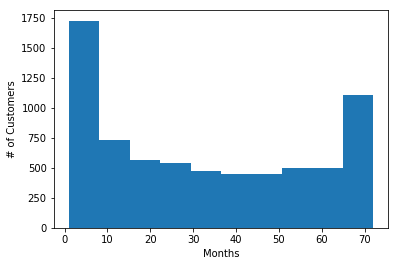

C:\Users\doshpara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


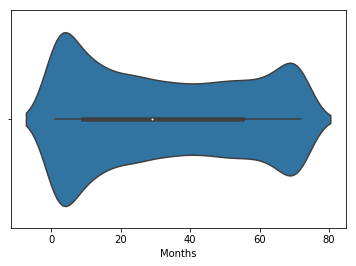

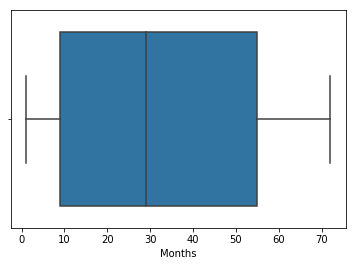

In [11]:
plt.hist(churndata['tenure'])
plt.xlabel('Months')
plt.ylabel('# of Customers')
plt.show()
sns.violinplot(churndata['tenure'])
plt.xlabel('Months')
plt.show()
sns.boxplot(churndata['tenure'])
plt.xlabel('Months')
plt.show()

### Monthly Charges
The biggest spike is in the # of customers that spend 30 or less a month.
Average customer pays ~7 per month

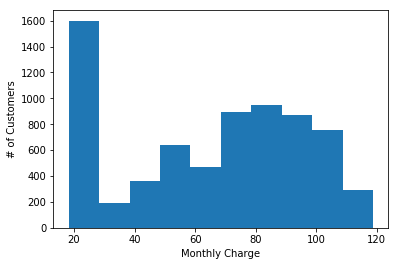

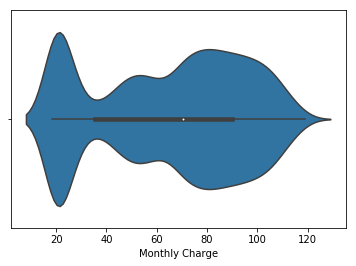

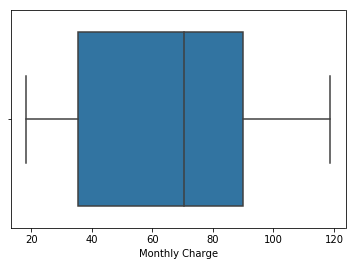

In [12]:
plt.hist(churndata['MonthlyCharges'])
plt.xlabel('Monthly Charge')
plt.ylabel('# of Customers')
plt.show()
sns.violinplot(churndata['MonthlyCharges'])
plt.xlabel('Monthly Charge')
plt.show()
sns.boxplot(churndata['MonthlyCharges'])
plt.xlabel('Monthly Charge')
plt.show()

### Total charges

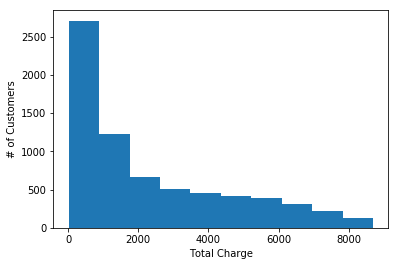

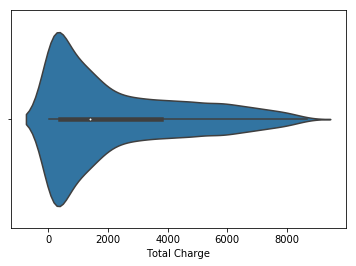

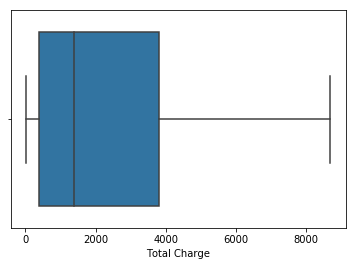

In [13]:
plt.hist(churndata['TotalCharges'])
plt.xlabel('Total Charge')
plt.ylabel('# of Customers')
plt.show()
sns.violinplot(churndata['TotalCharges'])
plt.xlabel('Total Charge')
plt.show()
sns.boxplot(churndata['TotalCharges'])
plt.xlabel('Total Charge')
plt.show()

### Bar plots for Discrete values

In [14]:
#for col in churndata:
#    if churndata[col].dtype == np.object:
#        col
#        plt.figure()
#        sns.countplot(churndata[col])

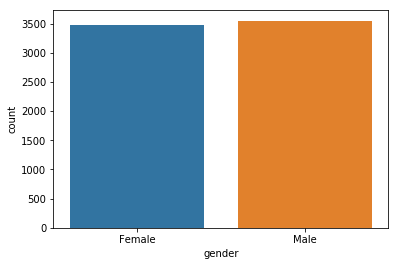

In [15]:
sns.countplot(churndata['gender'])

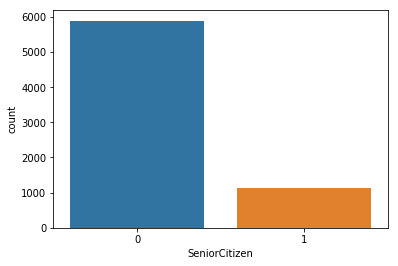

In [16]:
sns.countplot(churndata['SeniorCitizen'])

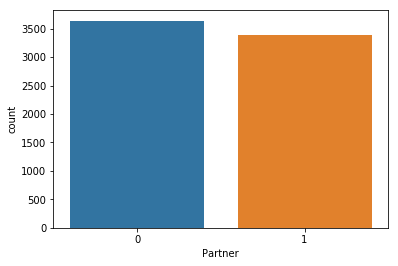

In [17]:
sns.countplot(churndata['Partner'])

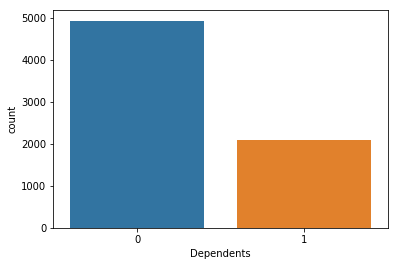

In [18]:
sns.countplot(churndata['Dependents'])

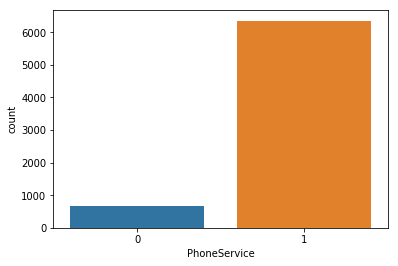

In [19]:
sns.countplot(churndata['PhoneService'])

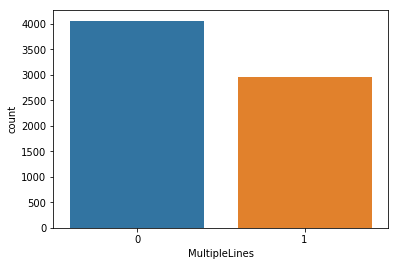

In [20]:
sns.countplot(churndata['MultipleLines'])

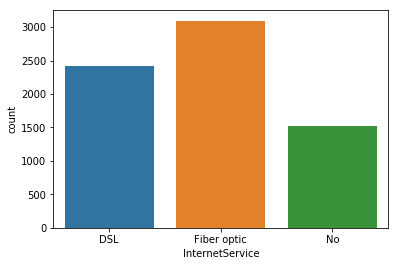

In [21]:
sns.countplot(churndata['InternetService'])

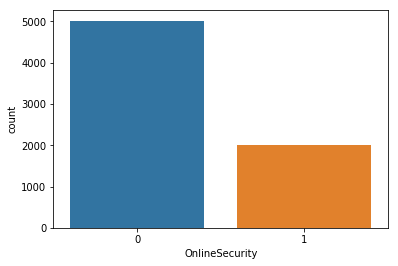

In [22]:
sns.countplot(churndata['OnlineSecurity'])

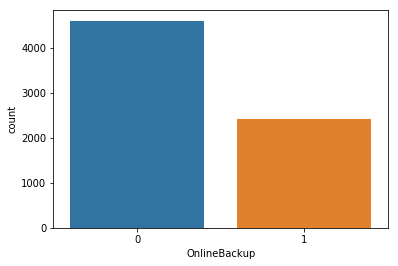

In [23]:
sns.countplot(churndata['OnlineBackup'])

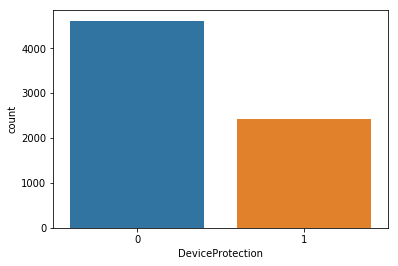

In [24]:
sns.countplot(churndata['DeviceProtection'])

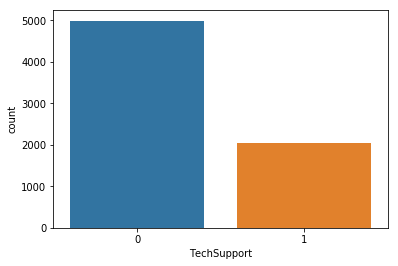

In [25]:
sns.countplot(churndata['TechSupport'])

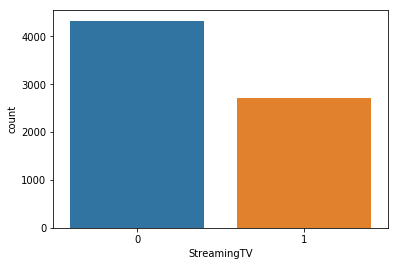

In [26]:
plt.figure()
sns.countplot(churndata['StreamingTV'])

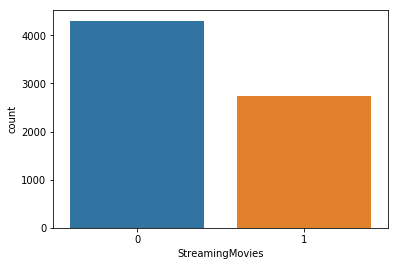

In [27]:
sns.countplot(churndata['StreamingMovies'])

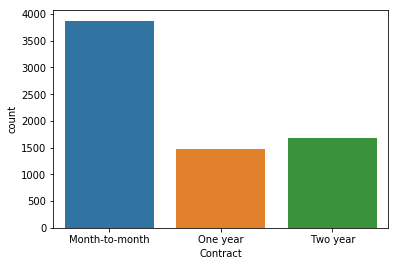

In [28]:
sns.countplot(churndata['Contract'])

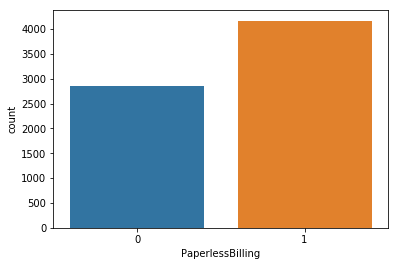

In [29]:
sns.countplot(churndata['PaperlessBilling'])

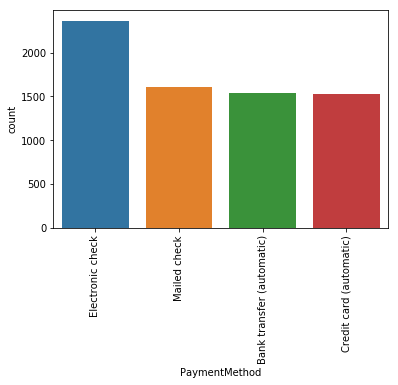

In [30]:
sns.countplot(churndata['PaymentMethod'])
plt.xticks(rotation=90)
plt.show()

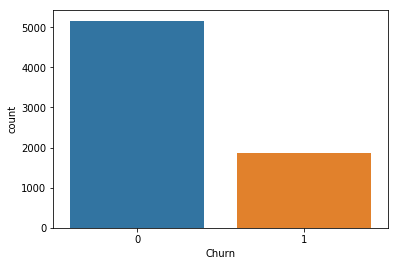

In [31]:
sns.countplot(churndata['Churn'])

### Relation between the variables: 

#### Tenure

,mean,std
Churn,,
0,37.650010,24.076940
1,17.979133,19.531123


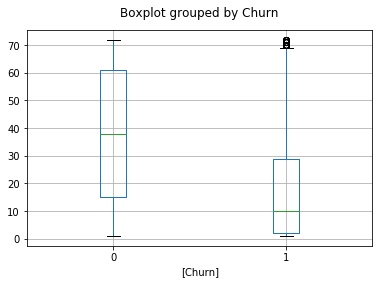

In [32]:
churndata.boxplot(column=['tenure'],by = ['Churn']) 
#.set_yscale('log')
plt.title('')
pd.DataFrame(churndata.groupby( ['Churn'])['tenure'].describe().loc[:,['mean','std']])

#### MonthlyCharges

,mean,std
Churn,,
0,61.307408,31.094557
1,74.441332,24.666053


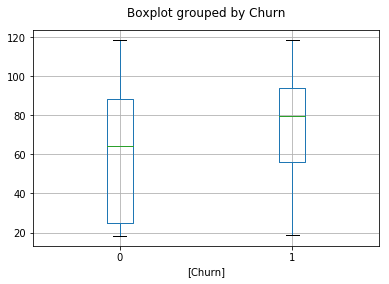

In [33]:
churndata.boxplot(column=['MonthlyCharges'],by = ['Churn'])
#.set_yscale('log')
plt.title('')
pd.DataFrame(churndata.groupby( ['Churn'])['MonthlyCharges'].describe().loc[:,['mean','std']])

#### TotalCharges

,mean,std
Churn,,
0,2555.344141,2329.456984
1,1531.796094,1890.822994


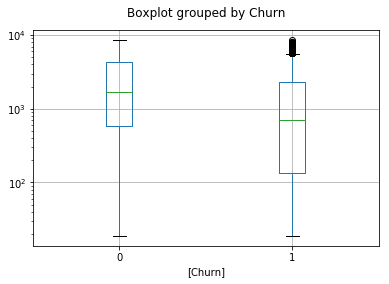

In [34]:
churndata.boxplot(column=['TotalCharges'],by = ['Churn']).set_yscale('log')
plt.title('')
pd.DataFrame(churndata.groupby( ['Churn'])['TotalCharges'].describe().loc[:,['mean','std']])

#### gender

,Churn
gender,
Female,0.269595
Male,0.262046


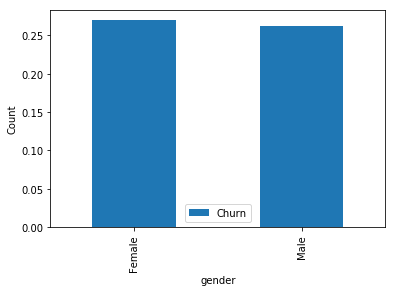

In [35]:
churndata.groupby(['gender'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['gender' ])[['Churn']].mean()

#### SeniorCitizen

,Churn
SeniorCitizen,
0,0.236503
1,0.416813


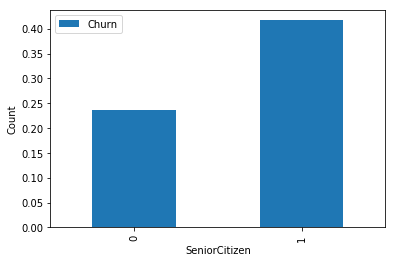

In [36]:
churndata.groupby(['SeniorCitizen'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['SeniorCitizen' ])[['Churn']].mean()

#### Partner

,Churn
Partner,
0,0.329761
1,0.197171


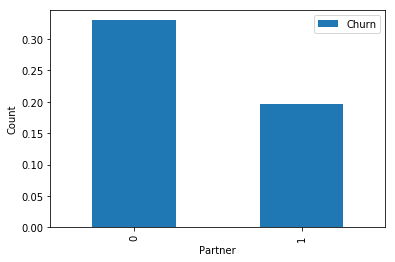

In [37]:
churndata.groupby(['Partner'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['Partner' ])[['Churn']].mean()

#### Dependents

,Churn
Dependents,
0,0.312791
1,0.155312


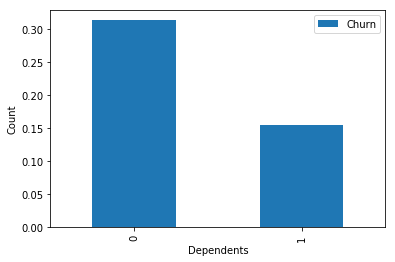

In [38]:
churndata.groupby(['Dependents'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['Dependents' ])[['Churn']].mean()

#### PhoneService

,Churn
PhoneService,
0,0.250000
1,0.267475


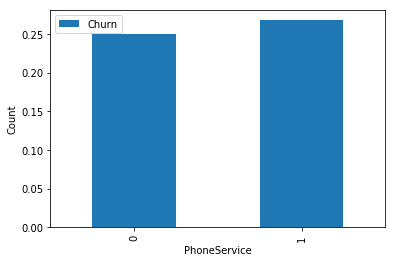

In [39]:
churndata.groupby(['PhoneService'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['PhoneService' ])[['Churn']].mean()

#### MultipleLines

,Churn
MultipleLines,
0,0.250677
1,0.286485


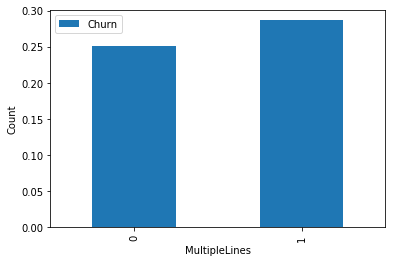

In [40]:
churndata.groupby(['MultipleLines'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['MultipleLines' ])[['Churn']].mean()

#### InternetService

,Churn
InternetService,
DSL,0.189983
Fiber optic,0.418928
No,0.074342


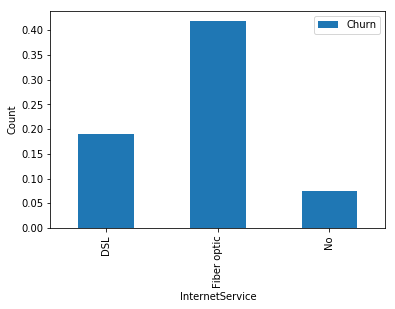

In [41]:
churndata.groupby(['InternetService'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['InternetService' ])[['Churn']].mean()

#### OnlineSecurity

,Churn
OnlineSecurity,
0,0.313733
1,0.146402


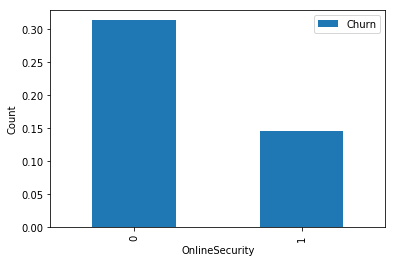

In [42]:
churndata.groupby(['OnlineSecurity'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['OnlineSecurity' ])[['Churn']].mean()

#### OnlineBackup

,Churn
OnlineBackup,
0,0.292164
1,0.215670


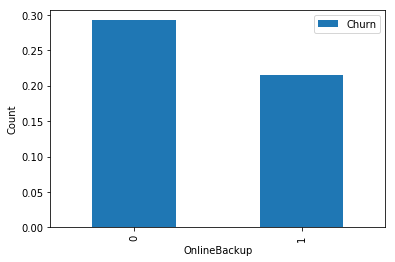

In [43]:
churndata.groupby(['OnlineBackup'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['OnlineBackup' ])[['Churn']].mean()

#### Device Protection

,Churn
DeviceProtection,
0,0.286953
1,0.225393


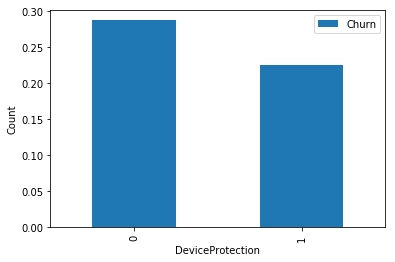

In [44]:
churndata.groupby(['DeviceProtection'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['DeviceProtection'])[['Churn']].mean()

#### TechSupport

,Churn
TechSupport,
0,0.312300
1,0.151961


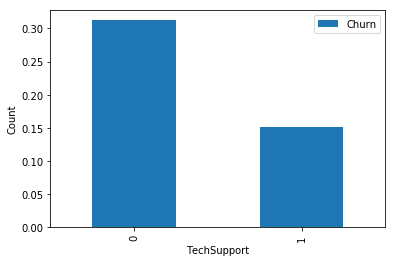

In [45]:
churndata.groupby(['TechSupport'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['TechSupport' ])[['Churn']].mean()

#### StreamingTV

,Churn
StreamingTV,
0,0.243705
1,0.301147


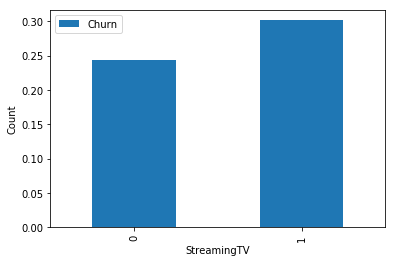

In [46]:
churndata.groupby(['StreamingTV'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['StreamingTV' ])[['Churn']].mean()

#### StreamingMovies

,Churn
StreamingMovies,
0,0.244362
1,0.299524


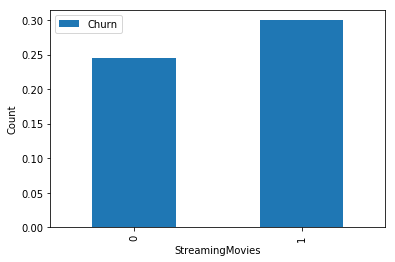

In [47]:
churndata.groupby(['StreamingMovies'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['StreamingMovies' ])[['Churn']].mean()

#### Contract

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


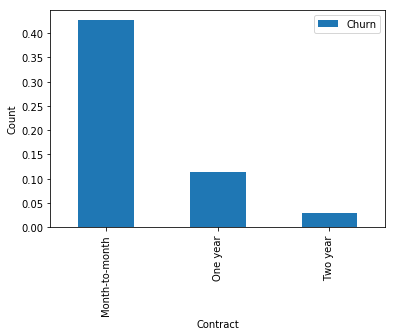

In [48]:
churndata.groupby(['Contract'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['Contract'])[['Churn']].mean()

#### PaperlessBilling

,Churn
PaperlessBilling,
0,0.163757
1,0.335893


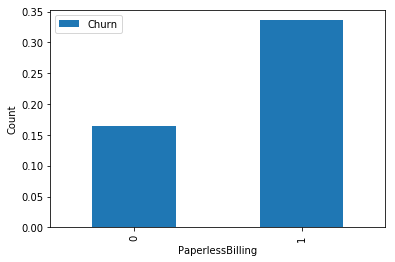

In [49]:
churndata.groupby(['PaperlessBilling'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['PaperlessBilling'])[['Churn']].mean()

#### PaymentMethod

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


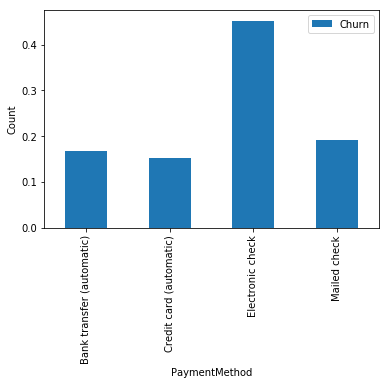

In [50]:
churndata.groupby(['PaymentMethod'])[['Churn']].mean().plot(kind='bar').set_ylabel('Count')
churndata.groupby(['PaymentMethod'])[['Churn']].mean()

## Step 4. Model Training

In [51]:
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID            7032 non-null object
gender                7032 non-null object
SeniorCitizen         7032 non-null int64
Partner               7032 non-null int64
Dependents            7032 non-null int64
tenure                7032 non-null int64
PhoneService          7032 non-null int64
MultipleLines         7032 non-null int64
InternetService       7032 non-null object
OnlineSecurity        7032 non-null int64
OnlineBackup          7032 non-null int64
DeviceProtection      7032 non-null int64
TechSupport           7032 non-null int64
StreamingTV           7032 non-null int64
StreamingMovies       7032 non-null int64
Contract              7032 non-null object
PaperlessBilling      7032 non-null int64
PaymentMethod         7032 non-null object
MonthlyCharges        7032 non-null float64
TotalCharges          7032 non-null float64
Churn                 7032 non-null int64
Ha

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [52]:
#Get Dummy variables
cols_to_transform = [ 'gender', 'InternetService', 'Contract', 'PaymentMethod']
churndata = pd.get_dummies(data=churndata, columns = cols_to_transform,drop_first=True)
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 26 columns):
customerID                               7032 non-null object
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
MultipleLines                            7032 non-null int64
OnlineSecurity                           7032 non-null int64
OnlineBackup                             7032 non-null int64
DeviceProtection                         7032 non-null int64
TechSupport                              7032 non-null int64
StreamingTV                              7032 non-null int64
StreamingMovies                          7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                        

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,HasInternetService,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,1,1,0,0,1,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,1,1,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,0,1,1,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0


In [53]:
churndata=churndata.drop(['customerID'], axis=1)
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
MultipleLines                            7032 non-null int64
OnlineSecurity                           7032 non-null int64
OnlineBackup                             7032 non-null int64
DeviceProtection                         7032 non-null int64
TechSupport                              7032 non-null int64
StreamingTV                              7032 non-null int64
StreamingMovies                          7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                         

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = churndata['Churn']
x = churndata.drop(['Churn'], axis=1)

# Split the data into a training and test set.
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(xtrain, ytrain)
# Print the accuracy from the testing data.
ypred = clf.predict(xtest)
print(accuracy_score(ypred, ytest))

0.7872582480091013


C:\Users\doshpara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
